<a href="https://colab.research.google.com/github/iamakshatjain/ego-Facebook/blob/master/SNA_fb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data set Description :

Here we are using facebook dataset which have undirected graph between nodes and edges and each node represent a particular user and each edge representing,there is a friendship between that nodes(users).

Finding random sample:

Here for reducing our run time for all parameters we use random sample of size 1000. 

In [0]:
import os
import random

filename = 'facebook.txt'

result = []
f = open("data.txt", "a")

with open(filename) as fh:
    data = fh.readlines()
    for line in data:
        if line:
            words = line.split()
            result.append(words)

sample = random.sample(result, 1000)

for item in sample:
    f.write(item[0] + "   " + item[1] + "\n")

In [0]:
import networkx as nx

#reading graph from list of edges
G=nx.read_edgelist('data.txt',nodetype=int,create_using=nx.DiGraph())

print(" ")

#general information about the graph
print (nx.info(G))

 
Name: 
Type: DiGraph
Number of nodes: 996
Number of edges: 701
Average in degree:   0.7038
Average out degree:   0.7038


Basic description of graph.

Here the Number of nodes are 2217 and Number of edges are 2668 
Average in degree and Average out degree is same because the graph is undiected.

Graph Visualization :



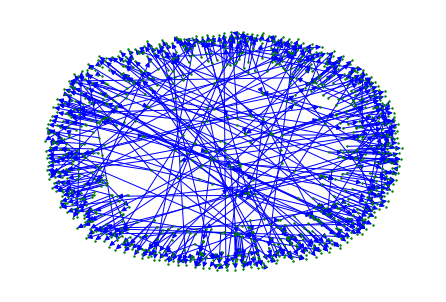

In [0]:
import matplotlib.pyplot as plt

# drawing graph
nx.draw(G, pos=None, node_color='g', edge_color='b',node_size=2)
plt.show()

Average local clustering coefficient

In [0]:
print(nx.average_clustering(G))

0.0008366800535475233


Global clustering coefficient

In [0]:
print(nx.transitivity(G))

0.0022935779816513763


Here the global and local clustering coefficient have very little value so there are very less triadiac closures in our data or more we can say that if a person is having two friends then possibility of becoming their friends is too less.

Reciprocity

In [0]:
print(nx.overall_reciprocity(G))

0.0


Transitivity

In [0]:
print(nx.transitivity(G))

0.0022935779816513763


Degree Centrality Distribution

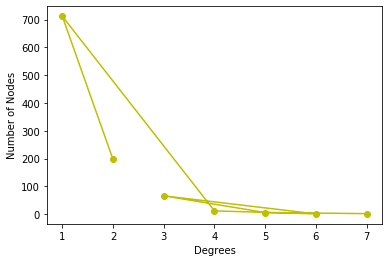

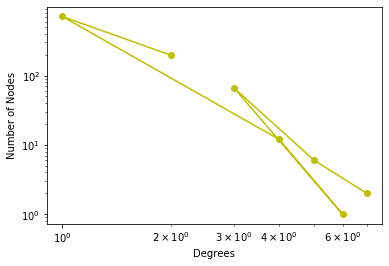

In [0]:
d={}
for x,y in nx.degree(G):
    if y not in d:
        d[y]=1
    else:
        d[y]+=1

plt.plot(list(d.keys()),list(d.values()),'yo-')
plt.xlabel("Degrees")
plt.ylabel("Number of Nodes")
plt.show()

#Log-Log graph
plt.loglog(list(d.keys()),list(d.values()),'yo-')
plt.xlabel("Degrees")
plt.ylabel("Number of Nodes")
plt.show()

Here the nodes which have high degree are low in number and nodes which have low degree are high in number,thus facebook network is following the pareto principle.And we expect this because we are using a social network. 






In [0]:
dict1=G.degree()
print("The node with maximum degree is :")
i = max(nx.degree_centrality(G),key=(nx.degree_centrality(G)).get)

val=dict1[i]
for p,r in dict1:
    if (r==val):
        print (str(p),str(r))

print("\n")   
print("Node    Degree Centrality")

dict_sorted_keys = sorted(nx.degree_centrality(G), key=(nx.degree_centrality(G)).get, reverse=True)
w=1
for r in dict_sorted_keys:
    if(w <= 5):
        w=w+1
        print(str(r)+"\t"+str(dict1[r]))

The node with maximum degree is :
1126 7
107 7


Node    Degree Centrality
1126	7
107	7
1912	6
2575	5
2032	5


Here the node with highest degree is 1126 and 107

Eigen Vector Centrality

In [0]:
dict =nx.eigenvector_centrality(G, max_iter = 10000)
i= max(nx.eigenvector_centrality(G, max_iter = 10000),key=(nx.eigenvector_centrality(G, max_iter = 10000)).get)
print("Node with maximum Eigenvector Centrality : ")
print(i,dict[i])

print("\n")
print("Node    Eigenvector Centrality")

dict_sorted_keys = sorted(dict, key=dict.get, reverse=True)
w=1
for r in dict_sorted_keys:
    if(w<=5):
        w=w+1
        print (str(r)+"\t"+str(dict[r]))

Node with maximum Eigenvector Centrality : 
2461 0.8114768831218483


Node    Eigenvector Centrality
2461	0.8114768831218483
2654	0.4225322652819503
2638	0.4005445279364461
2602	0.03409100483245505
2327	0.022229450042424773


The Eigen vector centrality for node 2461 is most.So 2461 is most important here.




katz centrality

In [0]:
dict =nx.katz_centrality(G,max_iter=10000)
i= max(nx.katz_centrality(G,max_iter=10000),key=(nx.katz_centrality(G,max_iter=10000)).get)
print("Node with maximum katz Centrality : ")
print(i,dict[i])

print("\n")
print("Node    katz Centrality")

dict_sorted_keys = sorted(dict, key=dict.get, reverse=True)
w=1
for r in dict_sorted_keys:
    if(w<=5):
        w=w+1
        print (str(r)+"\t"+str(dict[r]))

Node with maximum katz Centrality : 
2376 0.041848728961367584


Node    katz Centrality
2376	0.041848728961367584
2607	0.041583490538373
2552	0.04125931024360184
2602	0.040560849063049444
2630	0.03949105409030462


The katz centrality is maximum is highest for node 2376. so 2376 is most important.

Betweenness Centrality

In [0]:
dict =nx.betweenness_centrality(G)
i= max(nx.betweenness_centrality(G),key=(nx.betweenness_centrality(G)).get)
print("Node with maximum Betweenness Centrality : ")
print(i,dict[i])

print("\n")
print("Node    Betweenness Centrality")

dict_sorted_keys = sorted(dict, key=dict.get, reverse=True)
w=1
for r in dict_sorted_keys:
    if(w<=5):
        w=w+1
        print (str(r)+"\t"+str(dict[r]))

Node with maximum Betweenness Centrality : 
2575 2.1232925189326917e-05


Node    Betweenness Centrality
2575	2.1232925189326917e-05
2032	1.5166375135233512e-05
2428	1.213310010818681e-05
2194	1.1122008432504575e-05
2273	9.099825081140107e-06


The betweeness centrality is most for node 2575.So the most data or information can be passed from this node for most pair of nodes because the shortest path can be passed from this node. 

Closeness Centrality

In [0]:
dict =nx.closeness_centrality(G)
i= max(nx.closeness_centrality(G),key=(nx.closeness_centrality(G)).get)
print("Node with maximum Closeness Centrality : ")
print(i,dict[i])

print("\n")
print("Node    Closeness Centrality")

dict_sorted_keys = sorted(dict, key=dict.get, reverse=True)
w=1
for r in dict_sorted_keys:
    if(w<=5):
        w=w+1
        print (str(r)+"\t"+str(dict[r]))

Node with maximum Closeness Centrality : 
2602 0.00757274745822134


Node    Closeness Centrality
2602	0.00757274745822134
2376	0.004522613065326633
2630	0.0044769301050708084
2575	0.004103852596314908
2461	0.004053601340033501


The closeness centrality is maximum for node 2602.This signifies that node 2602 is more central or to say that it has least distance with all other nodes.

Question 2

In [0]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [0]:
a=[]
n=500

for k in range (51):
    #calculating probability
    p= (1.0)*(k)/(10.0*(n-1))
    #generating graph based on G(n,p) model
    G1=(nx.gnp_random_graph(n, p, seed=None, directed=False))
    #finding the giant component Ng
    giant = max(connected_component_subgraphs(G1), key=len)
    #calculating Ng/N ratio
    a.append(1.0*(giant.number_of_nodes())/(1.0*n))

#List containing all the ratios Ng/N for each average degree <k>  
print ("Ratios Ng/N :")
print (a)

Ratios Ng/N :
[0.002, 0.006, 0.006, 0.018, 0.012, 0.016, 0.044, 0.038, 0.05, 0.058, 0.24, 0.214, 0.176, 0.49, 0.452, 0.454, 0.52, 0.696, 0.734, 0.84, 0.806, 0.824, 0.836, 0.866, 0.908, 0.872, 0.922, 0.926, 0.92, 0.942, 0.932, 0.97, 0.94, 0.974, 0.97, 0.964, 0.982, 0.964, 0.98, 0.988, 0.968, 0.978, 0.976, 0.984, 0.99, 0.982, 0.996, 0.99, 0.986, 0.996, 0.992]


In [0]:
import matplotlib.pyplot as plt
b=[]

#storing all the average degrees <k> in list b
for i in range(0,51):
    b.append(i/10.0)
    
print ("Average degrees :")
print (b)

Average degrees :
[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0]


Text(0.5, 1.0, 'Evolution of Random Network')

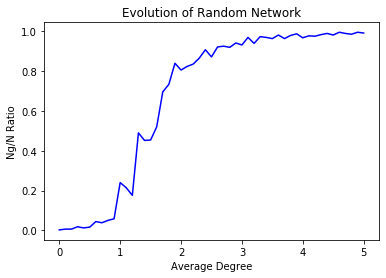

In [0]:
#Plotting graph between <k> and ratio Ng/N
plt.plot(b,a,'-b')

#X-axis label
plt.xlabel("Average Degree")
#Y-axis label
plt.ylabel("Ng/N Ratio")
#Plot title
plt.title("Evolution of Random Network")